<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework4_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Ex 15.17 – Binary Classification with the Breast Cancer Dataset
# Covers:
# - Loading dataset
# - Checking sample & target sizes
# - Train/test split
# - Model (GaussianNB), training, predicting
# - Estimator method score
# - Confusion matrix & classification report
# - Visualizing confusion matrix
# - KFold cross-validation with cross_val_score
# - Running multiple models (GaussianNB, KNN, LogisticRegression, SVC) to find best

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [63]:
#  Utility: pretty confusion-matrix plot (pure matplotlib, no seaborn)
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    fig, ax = plt.subplots(figsize=(5.2, 4.6))
    im = ax.imshow(cm, interpolation="nearest")
    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Annotate cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], "d"), ha="center", va="center")

    # Add colorbar (default colormap)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    fig.tight_layout()
    plt.show()

In [52]:
# Load dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

# Print data info
print("Features shape:", X.shape)          # (569, 30)
print("Target shape:", y.shape)            # (569,)
print("Classes:", list(target_names))      # ['malignant', 'benign']

Features shape: (569, 30)
Target shape: (569,)
Classes: [np.str_('malignant'), np.str_('benign')]


In [53]:
# Class distribution
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip([target_names[i] for i in unique], counts))
print("Class counts:", class_counts)

Class counts: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [54]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Training set:", X_train.shape, " Testing set:", X_test.shape)

Training set: (398, 30)  Testing set: (171, 30)


In [69]:
# Create & train GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict & metrics
y_pred = nb.predict(X_test)

print("=== GaussianNB Results (Test Set) ===")
acc = accuracy_score(y_test, y_pred)
print(f"Estimator method score (accuracy): {nb.score(X_test, y_test):.2%}")
print(f"Accuracy (accuracy_score):   {acc:.2%}")

=== GaussianNB Results (Test Set) ===
Estimator method score (accuracy): 94.74%
Accuracy (accuracy_score):   94.74%


Confusion Matrix:
 [[ 57   7]
 [  2 105]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



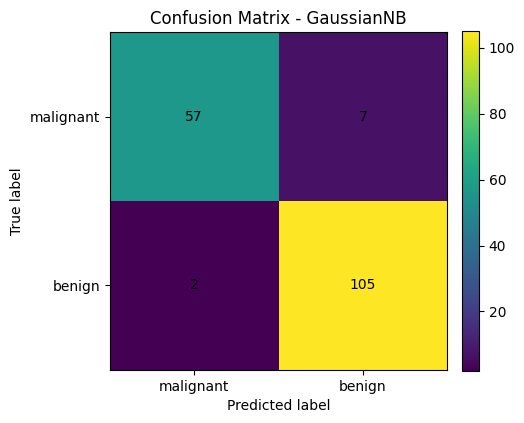

In [56]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Visualize confusion matrix
plot_confusion_matrix(cm, class_names=target_names, title="Confusion Matrix - GaussianNB")

In [65]:
# 10-fold cross-validation with KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
cv_scores_nb = cross_val_score(estimator=nb, X=X, y=y, cv=kfold)
print("=== GaussianNB 10-Fold CV ===")
print("Fold scores:", np.round(cv_scores_nb, 2))
print("Mean CV accuracy:", cv_scores_nb.mean().round(2))

=== GaussianNB 10-Fold CV ===
Fold scores: [0.96 0.91 0.95 0.89 0.96 0.95 0.96 0.89 0.96 0.93]
Mean CV accuracy: 0.94


In [61]:
# Run multiple models to find the best
estimators = {
    "GaussianNB": Pipeline(steps=[("clf", GaussianNB())]),
    "KNeighborsClassifier": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    "LogisticRegression": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(solver="lbfgs", multi_class="ovr", max_iter=10000))
    ]),
    "SVC": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", SVC(gamma="scale"))
    ])
}

print("=== Model Comparison via 10-Fold CV ===")
model_means = {}
for name, pipe in estimators.items():
    scores = cross_val_score(pipe, X, y, cv=kfold)
    mean_score = scores.mean()
    model_means[name] = mean_score
    print(f"{name:22s} Mean CV Accuracy = {mean_score:.2%}")

=== Model Comparison via 10-Fold CV ===
GaussianNB             Mean CV Accuracy = 93.85%
KNeighborsClassifier   Mean CV Accuracy = 96.83%
LogisticRegression     Mean CV Accuracy = 97.89%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

SVC                    Mean CV Accuracy = 97.89%


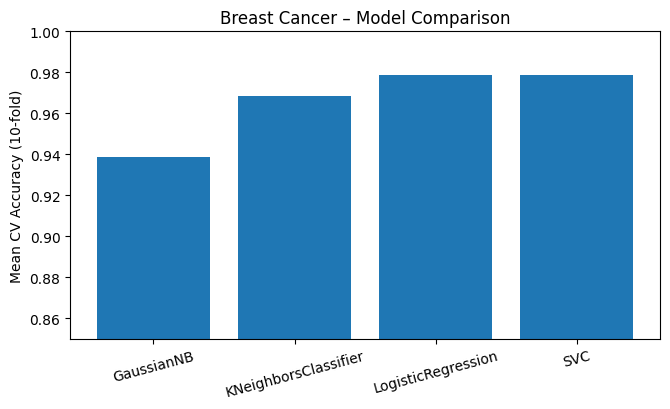

In [59]:
# Simple bar chart of CV means
plt.figure(figsize=(6.8, 4.2))
names = list(model_means.keys())
vals = [model_means[k] for k in names]
plt.bar(names, vals)
plt.ylabel("Mean CV Accuracy (10-fold)")
plt.title("Breast Cancer – Model Comparison")
plt.ylim(0.85, 1.00)  # typical range for this dataset
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [60]:
# Test accuracy of each model
print("\n=== Test-Set Accuracy for Each Model (same train/test split) ===")
for name, pipe in estimators.items():
    pipe.fit(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)
    print(f"{name:22s} Test Accuracy = {test_acc:.2%}")


=== Test-Set Accuracy for Each Model (same train/test split) ===
GaussianNB             Test Accuracy = 94.74%
KNeighborsClassifier   Test Accuracy = 95.91%
LogisticRegression     Test Accuracy = 98.83%
SVC                    Test Accuracy = 97.66%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
